## A) Make multilayer graph of painters and their styles from WikiArt

https://github.com/jkbren/matplotlib-multilayer-network<br>
https://nbviewer.org/github/jkbren/matplotlib-multilayer-network/blob/master/matplotlib-multilayer-networks.ipynb

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import networkx as nx
import matplotlib.patheffects as path_effects
from mpl_toolkits.mplot3d.art3d import Line3DCollection
%matplotlib inline

In [198]:
wikiart_artists_styles = pd.read_csv('datasets\wikiart_artists_styles_grouped.csv')
wikiart_styles = wikiart_artists_styles['style'].unique(); wikiart_artists = wikiart_artists_styles['artist'].unique(); wikiart_movements = wikiart_artists_styles['movement'].unique()

In [150]:
G_artists_A = nx.Graph(); G_artists_A.add_nodes_from(wikiart_artists)
G_styles_A = nx.Graph(); G_styles_A.add_nodes_from(wikiart_styles)
G_movements_A = nx.Graph(); G_movements_A.add_nodes_from(wikiart_movements)

In [ ]:
for i in range(len(wikiart_artists)):
    artist_styles = (wikiart_artists_styles[wikiart_artists_styles['artist'] == wikiart_artists[i]][['style', 'count']]).reset_index(drop=True)
    for j in range(len(artist_styles)):
        for k in range(j+1, len(artist_styles)):
            if not G_styles_A.has_edge(artist_styles['style'].iloc[j], artist_styles['style'].iloc[k]):
                    G_styles_A.add_edge(artist_styles['style'].iloc[j], artist_styles['style'].iloc[k], weight= min(artist_styles['count'].iloc[j], artist_styles['count'].iloc[k]))
            else:

                G_styles_A[artist_styles['style'].iloc[j]][artist_styles['style'].iloc[k]]['weight'] += min(artist_styles['count'].iloc[j], artist_styles['count'].iloc[k])

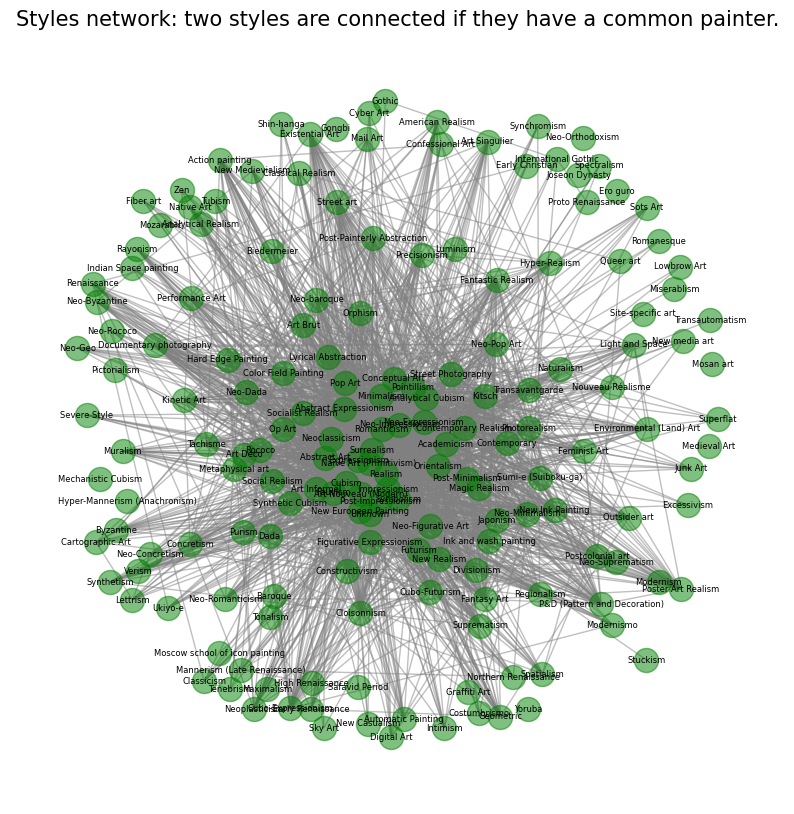

In [203]:
plt.figure(figsize=(10,10))
pos2 = nx.spring_layout(G_styles_A, k=2.4,iterations=40)
nx.draw_networkx_nodes(G_styles_A, pos2, node_size=300, node_color='green', alpha=0.5)
nx.draw_networkx_edges(G_styles_A, pos2, width=1.0, alpha=0.5, edge_color='grey')
nx.draw_networkx_labels(G_styles_A, pos2, font_size=6, font_family='sans-serif', font_color='black',)
plt.axis('off')
plt.title('Styles network: two styles are connected if they have a common painter.', fontsize=15)
plt.show()

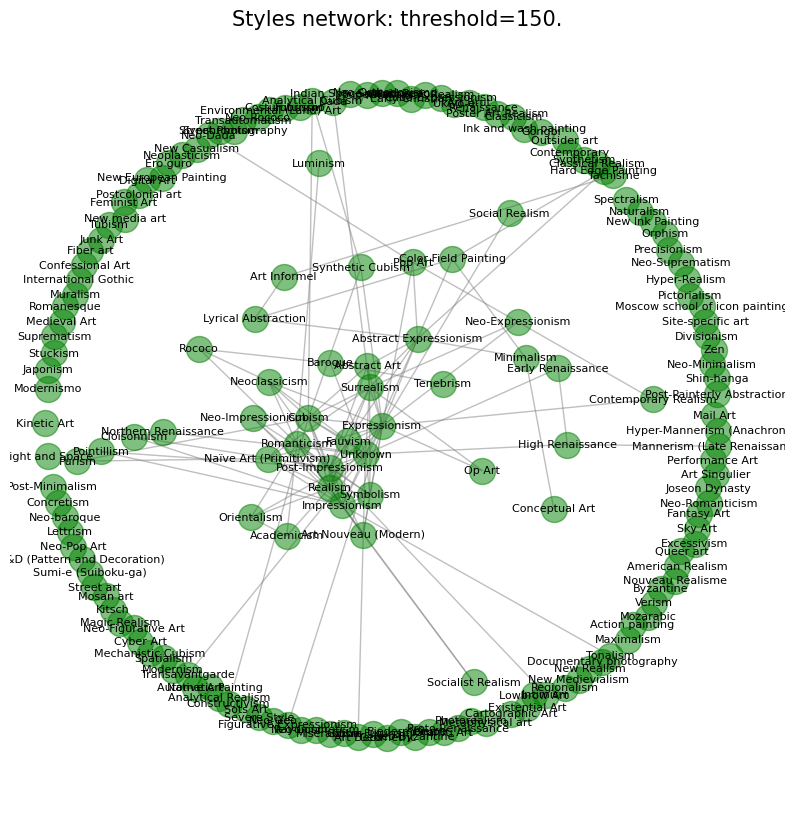

In [206]:
threshold = 100
G2_copy = G_styles_A.copy()
for edge in G2_copy.edges():
    if G2_copy[edge[0]][edge[1]]['weight'] < threshold:
        G2_copy.remove_edge(edge[0], edge[1])

plt.figure(figsize=(10,10))
pos2c = nx.spring_layout(G2_copy, k=20.8,iterations=400)
nx.draw_networkx_nodes(G2_copy, pos2c, node_size=350, node_color='green', alpha=0.5)
nx.draw_networkx_edges(G2_copy, pos2c, width=1.0, alpha=0.5, edge_color='grey')
nx.draw_networkx_labels(G2_copy, pos2c, font_size=8, font_family='sans-serif', font_color='black',)
plt.axis('off')
plt.title('Styles network: threshold=150.', fontsize=15)
plt.show()

In [133]:
#Save graph to Gephi
nx.write_gexf(G2_copy, "networks/G2_copy.gexf")
nx.write_gexf(G_styles_A, "networks/G_styles_A.gexf")

In [134]:
#Save graph to CytoScape
nx.write_graphml(G2_copy, "networks/G2_copy.graphml")
nx.write_graphml(G_styles_A, "networks/G_styles_A.graphml")

Gephi drawing:

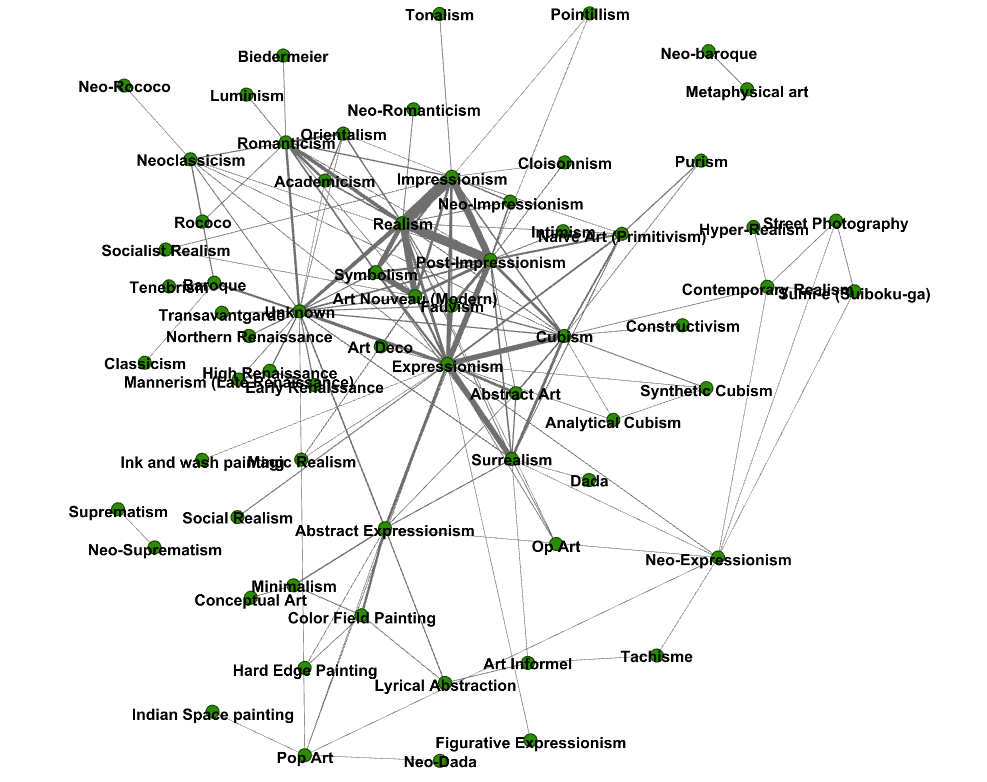

## Art movements:

In [152]:
for i in range(len(wikiart_styles)):
    styles_movements = (wikiart_artists_styles[wikiart_artists_styles['style'] == wikiart_styles[i]][['movement', 'count']]).reset_index(drop=True)
    for j in range(len(styles_movements)):
        for k in range(j+1, len(styles_movements)):
            if not G_movements_A.has_edge(styles_movements['movement'].iloc[j], styles_movements['movement'].iloc[k]):
                if not styles_movements['movement'].iloc[j] == styles_movements['movement'].iloc[k]:
                    G_movements_A.add_edge(styles_movements['movement'].iloc[j], styles_movements['movement'].iloc[k], weight= min(styles_movements['count'].iloc[j], styles_movements['count'].iloc[k]))
            else:

                G_movements_A[styles_movements['movement'].iloc[j]][styles_movements['movement'].iloc[k]]['weight'] += min(styles_movements['count'].iloc[j], styles_movements['count'].iloc[k])
G_movements_A

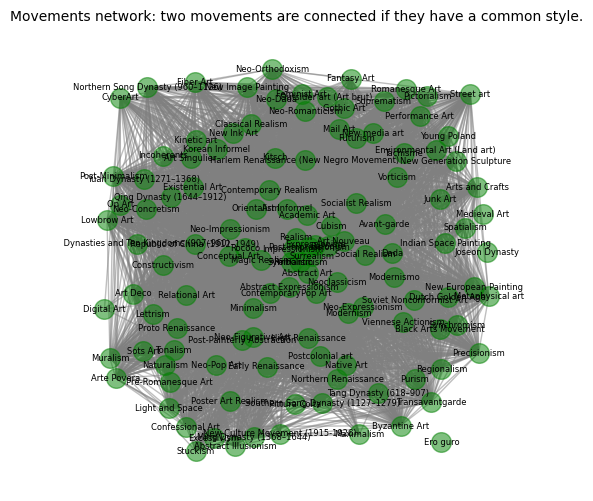

In [196]:
#Plot the graph
plt.figure(figsize=(6,6))
pos3 = nx.spring_layout(G_movements_A, k=5.4,iterations=7)
nx.draw_networkx_nodes(G_movements_A, pos3, node_size=200, node_color='green', alpha=0.5)
nx.draw_networkx_edges(G_movements_A, pos3, width=1.0, alpha=0.5, edge_color='grey')
nx.draw_networkx_labels(G_movements_A, pos3, font_size=6, font_family='sans-serif', font_color='black',)
plt.axis('off')
plt.title('Movements network: two movements are connected if they have a common style.', fontsize=10)
plt.show()

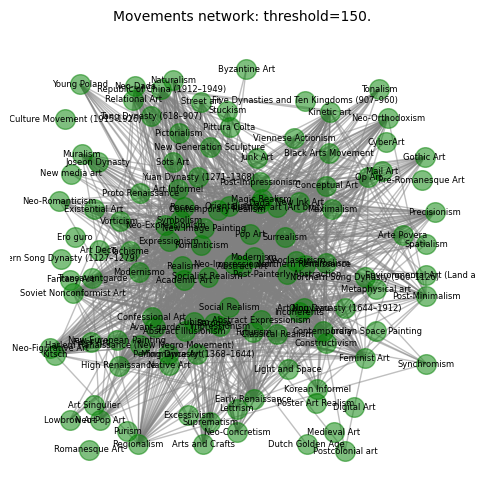

In [197]:
#Threshold
threshold = 100
G3_copy = G_movements_A.copy()
for edge in G3_copy.edges():
    if G3_copy[edge[0]][edge[1]]['weight'] < threshold:
        G3_copy.remove_edge(edge[0], edge[1])

#Plot the graph
plt.figure(figsize=(6,6))
pos3c = nx.spring_layout(G3_copy, k=4.4,iterations=3)
nx.draw_networkx_nodes(G3_copy, pos3c, node_size=200, node_color='green', alpha=0.5)
nx.draw_networkx_edges(G3_copy, pos3c, width=1.0, alpha=0.5, edge_color='grey')
nx.draw_networkx_labels(G3_copy, pos3c, font_size=6, font_family='sans-serif', font_color='black',)
plt.axis('off')
plt.title('Movements network: threshold=150.', fontsize=10)
plt.show()


In [157]:
#Save graph to Gephi
nx.write_gexf(G3_copy, "networks/G3_copy.gexf")
nx.write_gexf(G_movements_A, "networks/G_movements_A.gexf")

Gephi drawings (thresholded):
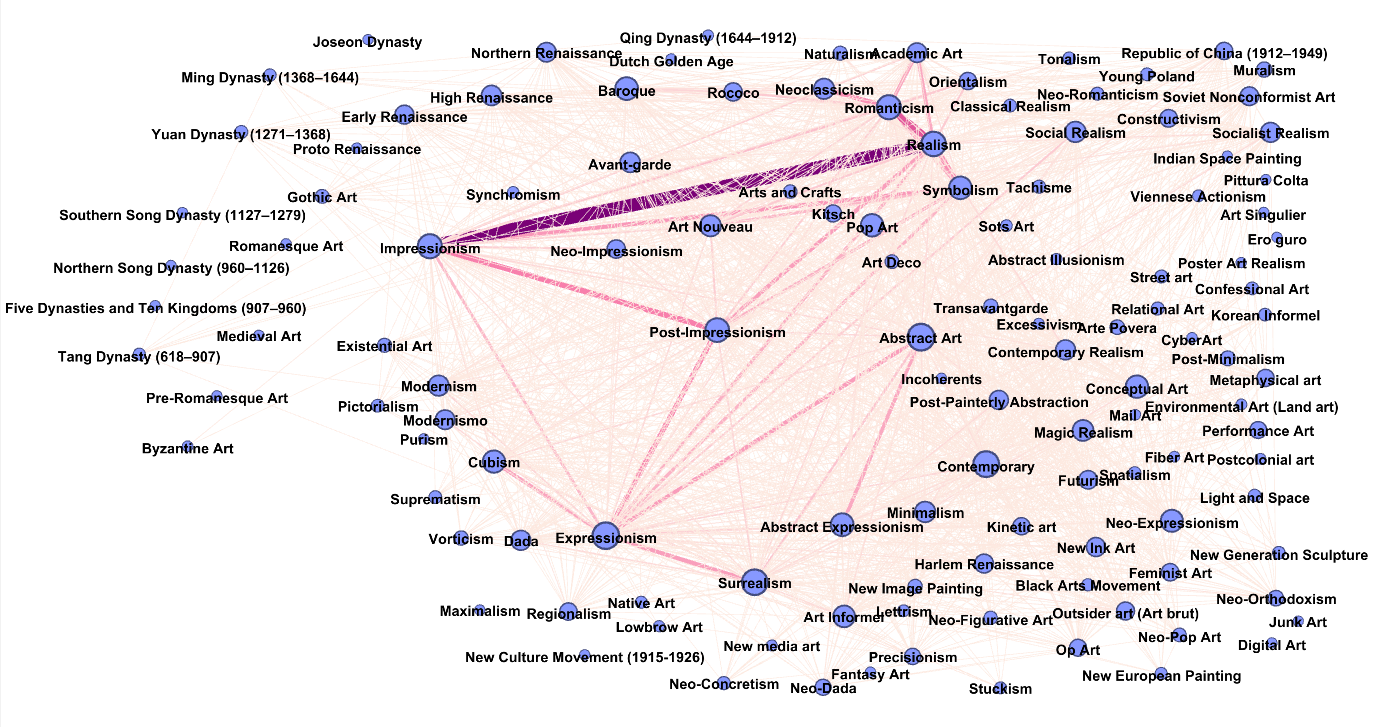

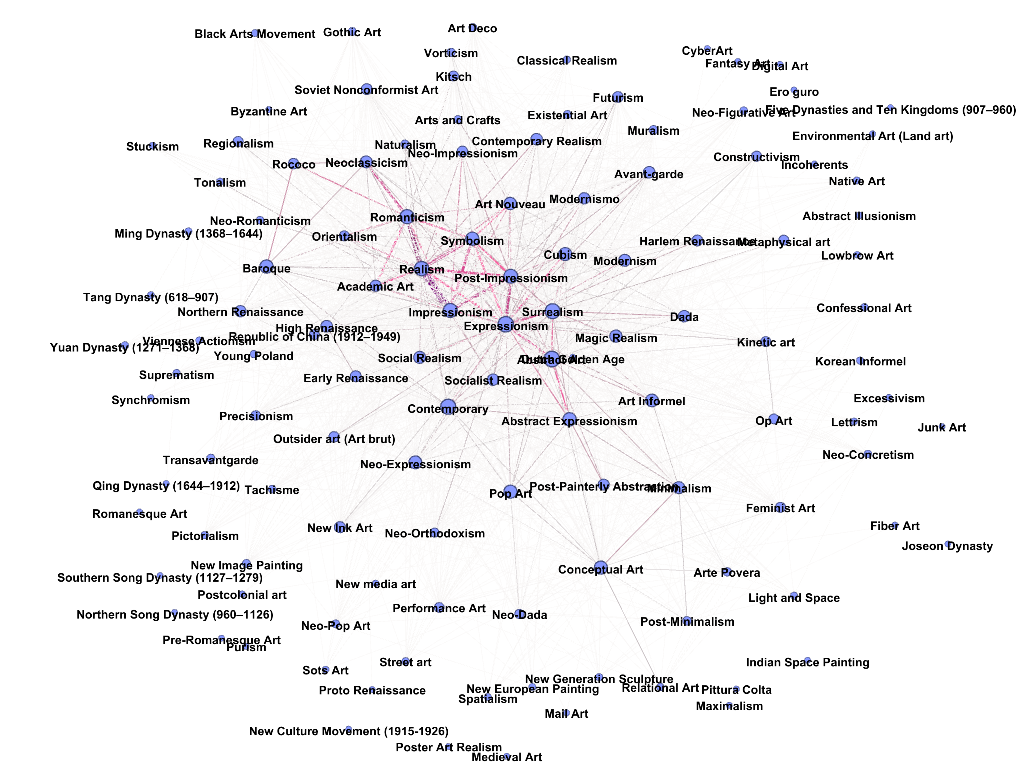

## Multilayer graph of painters, styles and movements (WikiArt only)

Something for 3D edges:
for i in range(len(wikiart_artists_styles)):
    G_artists_A.add_edge(wikiart_artists_styles['artist'][i], wikiart_artists_styles['style'][i])
    G_styles_A.add_edge(wikiart_artists_styles['style'][i], wikiart_artists_styles['movement'][i])
    G_movements_A.add_edge(wikiart_artists_styles['movement'][i], wikiart_artists_styles['artist'][i])

In [178]:
pos1 = nx.spring_layout(G_artists_A, k=0.9, iterations=2)
pos2 = nx.spring_layout(G_styles_A, k=2.4,iterations=70)
pos3 = nx.spring_layout(G3_copy, k=5.4,iterations=7) #G_movements_A is too dense

Some other plotting options:<br>
https://stackoverflow.com/questions/14283341/how-to-increase-node-spacing-for-networkx-spring-layout

<details><summary>Fruchterman-Reingold modified</summary>
    
```python

def _fruchterman_reingold(
    A, k=None, pos=None, fixed=None, iterations=50, threshold=1e-4, dim=2, seed=None
):
    # Position nodes in adjacency matrix A using Fruchterman-Reingold
    # Entry point for NetworkX graph is fruchterman_reingold_layout()
    import numpy as np

    try:
        nnodes, _ = A.shape
    except AttributeError as err:
        msg = "fruchterman_reingold() takes an adjacency matrix as input"
        raise nx.NetworkXError(msg) from err

    if pos is None:
        # random initial positions
        pos = np.asarray(seed.rand(nnodes, dim), dtype=A.dtype)
    else:
        # make sure positions are of same type as matrix
        pos = pos.astype(A.dtype)

    # optimal distance between nodes
    if k is None:
        k = np.sqrt(1.0 / nnodes)
    # the initial "temperature"  is about .1 of domain area (=1x1)
    # this is the largest step allowed in the dynamics.
    # We need to calculate this in case our fixed positions force our domain
    # to be much bigger than 1x1
    t = max(max(pos.T[0]) - min(pos.T[0]), max(pos.T[1]) - min(pos.T[1])) * 0.1
    # simple cooling scheme.
    # linearly step down by dt on each iteration so last iteration is size dt.
    dt = t / (iterations + 1)
    delta = np.zeros((pos.shape[0], pos.shape[0], pos.shape[1]), dtype=A.dtype)
    # the inscrutable (but fast) version
    # this is still O(V^2)
    # could use multilevel methods to speed this up significantly
    for iteration in range(iterations):
        # matrix of difference between points
        delta = pos[:, np.newaxis, :] - pos[np.newaxis, :, :]
        # distance between points
        distance = np.linalg.norm(delta, axis=-1)
        # enforce minimum distance of 0.01
        np.clip(distance, 0.01, None, out=distance)
        # displacement "force"
        displacement = np.einsum(
            "ijk,ij->ik", delta, (k * k / distance**2 - A * distance / k)
        )
        
        # ADD THIS LINE - prevent things from flying off into infinity if not connected
        displacement = displacement - pos / ( k * np.sqrt(nnodes))

        # update positions
        length = np.linalg.norm(displacement, axis=-1)
        length = np.where(length < 0.01, 0.1, length)
        delta_pos = np.einsum("ij,i->ij", displacement, t / length)
        if fixed is not None:
            # don't change positions of fixed nodes
            delta_pos[fixed] = 0.0
        pos += delta_pos
        # cool temperature
        t -= dt
        if (np.linalg.norm(delta_pos) / nnodes) < threshold:
            break
    return pos

```
</details>


In [179]:
#Setup
cols = ['mediumseagreen', 'darksalmon','steelblue' ]#Colors
np.random.seed(42)
graphs = [G_artists_A,G_styles_A, G3_copy]

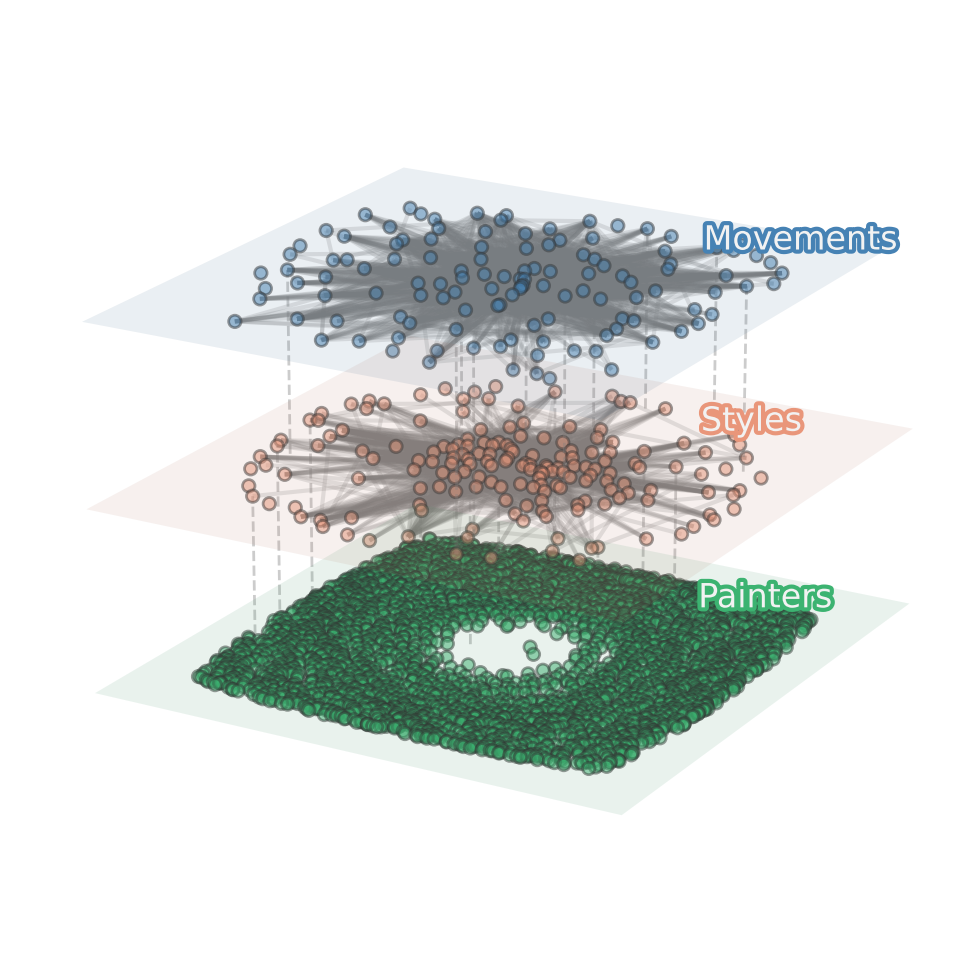

In [183]:
w = 8
h = 6

fig, ax = plt.subplots(1, 1, figsize=(w,h), dpi=200, subplot_kw={'projection':'3d'})

for gi, G in enumerate(graphs):
    # node positions
    if gi == 0:
        pos = pos1
    if gi == 1:
        pos = pos2
    if gi == 2:
        pos = pos3
    
    xs = list(list(zip(*list(pos.values())))[0])
    ys = list(list(zip(*list(pos.values())))[1])
    zs = [gi]*len(xs) # set a common z-position of the nodes 

    # node colors
    cs = [cols[gi]]*len(xs)
    
    #Inbetween layer connections
    if gi > 0:
        thru_nodes = np.random.choice(list(G.nodes()),10,replace=False)
        lines3d_between = [(list(pos[i])+[gi-1],list(pos[i])+[gi]) for i in thru_nodes]
        between_lines = Line3DCollection(lines3d_between, zorder=gi, color='.5',
                                         alpha=0.4, linestyle='--', linewidth=1)
        ax.add_collection3d(between_lines)

    # add within-layer edges
    lines3d = [(list(pos[i])+[gi],list(pos[j])+[gi]) for i,j in G.edges()]
    line_collection = Line3DCollection(lines3d, color="grey", zorder=gi, alpha=0.2)
    ax.add_collection3d(line_collection)
    
    # now add nodes
    ax.scatter(xs, ys, zs, c=cs, edgecolors='.2',  alpha=0.5, zorder=gi+1)
    
    # add a plane to designate the layer
    xdiff = max(xs)-min(xs)
    ydiff = max(ys)-min(ys)
    ymin = min(ys)-ydiff*0.1
    ymax = max(ys)+ydiff*0.1
    xmin = min(xs)-xdiff*0.1 * (w/h)
    xmax = max(xs)+xdiff*0.1 * (w/h)
    xx, yy = np.meshgrid([xmin, xmax],[ymin, ymax])
    zz = np.zeros(xx.shape)+gi
    ax.plot_surface(xx, yy, zz, color=cols[gi], alpha=0.1, zorder=gi)

    # add label
    if gi == 0:
        text = "Painters"
    if gi == 1:
        text = "Styles"
    if gi == 2:
        text = "Movements"
    layertext = ax.text(0.0, 0.85, gi*0.95+0.5, text,
                        color='.95', fontsize='large', zorder=1e5, ha='left', va='center',
                        path_effects=[path_effects.Stroke(linewidth=3, foreground=cols[gi]),
                                      path_effects.Normal()])

# set them all at the same x,y,zlims
ax.set_ylim(min(ys)-ydiff*0.1,max(ys)+ydiff*0.1)
ax.set_xlim(min(xs)-xdiff*0.1,max(xs)+xdiff*0.1)
ax.set_zlim(-0.1, len(graphs) - 1 + 0.1)

# select viewing angle
angle = 30
height_angle = 20
ax.view_init(height_angle, angle)

# how much do you want to zoom into the fig
ax.dist = 9.5

ax.set_axis_off()

# plt.savefig('multilayer_network.png',dpi=425,bbox_inches='tight')
plt.show()


### PageRank / Wiki Connections:
<details><summary><u>Examples</u></summary>
    
The Python Class 6 notebook had a good example for PageRank

Wiki Connections: full dataset http://www.iesl.cs.umass.edu/data/data-wiki-links<br>
smaller dataset: https://snap.stanford.edu/data/wikispeedia.html

</details>

## B) More data: places, styles with years, etc.

In [241]:
artists = pd.read_csv('datasets/artists.csv')
artists

artist     Nationality            birth_place  \
0              Ad Reinhardt        American                Buffalo   
1               Adnan Coker         Turkish                    NaN   
2        Akkitham Narayanan          Indian                 Kerala   
3          Alberto Magnelli  Italian,French               Florence   
4        Alekos Kontopoulos           Greek                  Lamia   
...                     ...             ...                    ...   
2452  Marianne von Werefkin             NaN                   Tula   
2453         Robert Demachy          French  Saint-Germain-en-Laye   
2454      Wolfgang Tillmans             NaN              Remscheid   
2455               Wu Daozi         Chinese               Chang'an   
2456           Olowe of Ise             NaN                    NaN   

      birth_year                                             styles  \
0         1913.0  Abstract Art, Abstract Expressionism, Color Fi...   
1            NaN               Abstract Art, Abstract Expressionism   
2         1939.0                                       Abstract Art   
3         1888.0  Abstract Art, Art Nouveau (Modern), Cubism, Ex...   
4         1904.0  Abstract Art, Cubism, Expressionism, Post-Impr...   
...          ...                                                ...   
2452      1860.0                                            Unknown   
2453      1859.0                                            Unknown   
2454      1968.0                                            Unknown   
2455       680.0                                            Unknown   
2456         NaN                                             Yoruba   

                                        styles_extended  \
0     {Abstract Art:15},{Abstract Expressionism:5},{...   
1          {Abstract Art:25},{Abstract Expressionism:3}   
2                                     {Abstract Art:17}   
3     {Abstract Art:19},{Art Nouveau (Modern):2},{Cu...   
4     {Abstract Art:26},{Cubism:5},{Expressionism:10...   
...                                                 ...   
2452                                       {Unknown:61}   
2453                                       {Unknown:24}   
2454                                        {Unknown:9}   
2455                                        {Unknown:8}   
2456                                        {Yoruba:13}   

                                            StylesYears  \
0     Expressionism:1944-1946,,Abstract Art:1937-194...   
1     Abstract Art:1992-2008,,Abstract Expressionism...   
2                               Abstract Art:1974-1974,   
3     Abstract Art:1916-1971,,Cubism:1914-1935,,Meta...   
4     Post-Impressionism:1932-1955,,Expressionism:19...   
...                                                 ...   
2452                                                NaN   
2453                                                NaN   
2454                                                NaN   
2455                                                NaN   
2456                                                NaN   

                                            StylesCount  \
0     {Expressionism:7}, {Abstract Art:15}, {Color F...   
1         {Abstract Art:25}, {Abstract Expressionism:3}   
2                                     {Abstract Art:17}   
3     {Abstract Art:21}, {Cubism:10}, {Metaphysical ...   
4     {Post-Impressionism:8}, {Expressionism:11}, {R...   
...                                                 ...   
2452                                                NaN   
2453                                                NaN   
2454                                                NaN   
2455                                                NaN   
2456                                                NaN   

                    movement  \
0     Abstract Expressionism   
1               Abstract Art   
2               Abstract Art   
3               Abstract Art   
4             Social Realism   
...     

In [243]:
artists.columns

Index(['artist', 'Nationality', 'birth_place', 'birth_year', 'styles',
       'styles_extended', 'StylesYears', 'StylesCount', 'movement',
       'ArtMovement', 'pictures_count', 'FirstYear', 'LastYear', 'Places',
       'PlacesYears', 'PaintingSchool', 'Influencedby', 'Influencedon',
       'Pupils', 'Teachers', 'FriendsandCoworkers'],
      dtype='object')

### Example for many attributes:

In [242]:
artist = "Pablo Picasso"
artists[artists['artist'] == artist]

artist Nationality birth_place  birth_year  \
381  Pablo Picasso     Spanish      Málaga      1881.0   

                                                styles  \
381  Academicism, Analytical Cubism, Art Nouveau (M...   

                                       styles_extended  \
381  {Academicism:1},{Analytical Cubism:48},{Art No...   

                                           StylesYears  \
381  Impressionism:1895-1916,,Expressionism:1899-19...   

                                           StylesCount            movement  \
381  {Impressionism:22}, {Expressionism:220}, {Symb...  Post-Impressionism   

                                      ArtMovement  ...  FirstYear  LastYear  \
381  {Modern art:1},{Surrealism:1},{Cubism:1132},  ...     1899.0    1972.0   

                                                Places  \
381  London, Manchester, Greece, CA, Moscow, UK, Sp...   

                                           PlacesYears  PaintingSchool  \
381  Paris:1895-1960,,France:1895-1960,,Vallauris:1...  École de Paris   

                                          Influencedby  \
381  Marc Chagall,Henri Rousseau,El Greco,Francisco...   

                                          Influencedon Pupils  \
381  Marc Chagall,Amedeo Modigliani,Willem de Kooni...    NaN   

                                              Teachers  \
381  African Period,Neoclassicist & Surrealist Peri...   

                                   FriendsandCoworkers  
381  Georges Braque,Constantin Brancusi,Man Ray,Max...  

[1 rows x 21 columns]

In [236]:
Picasso_styles_years = [x for x in artists[artists['artist'] == artist]["StylesYears"].iloc[0].split(",") if x != '']
Picasso_styles_years_tuple = [(x.split(":")[0], int(x.split(":")[1].split("-")[0]), int(x.split(":")[1].split("-")[1])) for x in Picasso_styles_years]
Picasso_styles_years_tuple

[('Impressionism', 1895, 1916),
 ('Expressionism', 1899, 1972),
 ('Symbolism', 1900, 1958),
 ('Cubism', 1906, 1971),
 ('Post-Impressionism', 1890, 1938),
 ('Naïve Art (Primitivism)', 1902, 1970),
 ('Analytical Cubism', 1907, 1913),
 ('Neoclassicism', 1906, 1970),
 ('Synthetic Cubism', 1912, 1926),
 ('Realism', 1893, 1918),
 ('Pointillism', 1917, 1917),
 ('Surrealism', 1920, 1971),
 ('Art Nouveau (Modern)', 1897, 1920),
 ('Academicism', 1924, 1924),
 ('Japonism', 1901, 1902)]

In [239]:
Picasso_styles_count = [x.replace("{","").replace("}","") for x in artists[artists['artist'] == artist]["styles_extended"].iloc[0].split(",")]
Picasso_styles_count_tuple = [(x.split(":")[0], int(x.split(":")[1])) for x in Picasso_styles_count]
Picasso_styles_count_tuple

[('Academicism', 1),
 ('Analytical Cubism', 48),
 ('Art Nouveau (Modern)', 16),
 ('Cubism', 148),
 ('Expressionism', 190),
 ('Impressionism', 22),
 ('Japonism', 2),
 ('Naïve Art (Primitivism)', 72),
 ('Neoclassicism', 74),
 ('Pointillism', 2),
 ('Post-Impressionism', 116),
 ('Realism', 26),
 ('Surrealism', 356),
 ('Symbolism', 31),
 ('Synthetic Cubism', 60),
 ('Unknown', 6)]

In [240]:
Picasso_places_years = [x for x in artists[artists['artist'] == artist]["PlacesYears"].iloc[0].split(",") if x != '']
Picasso_places_years_tuple = [(x.split(":")[0], int(x.split(":")[1].split("-")[0]), int(x.split(":")[1].split("-")[1])) for x in Picasso_places_years]
Picasso_places_years_tuple

[('Paris', 1895, 1960),
 ('France', 1895, 1960),
 ('Vallauris', 1949, 1957),
 ('Barcelona', 1893, 1962),
 ('Spain', 1893, 1962),
 ('Saint Petersburg', 1901, 1958),
 ('Russia', 1900, 1958),
 ('Detroit', 1909, 1909),
 ('MI', 1909, 1909),
 ('US', 1900, 1963),
 ('London', 1901, 1937),
 ('UK', 1901, 1937),
 ('Aachen', 1913, 1913),
 ('Germany', 1905, 1945),
 ('Antibes', 1917, 1933),
 ('OH', 1903, 1939),
 ('Tokyo', 1923, 1923),
 ('Japan', 1923, 1938),
 ('New York City', 1904, 1946),
 ('NY', 1904, 1946),
 ('Chicago', 1901, 1954),
 ('IL', 1901, 1954),
 ('Madrid', 1913, 1937),
 ('Athens', 1934, 1934),
 ('Greece', 1934, 1934),
 ('Canberra', 1933, 1934),
 ('Australia', 1905, 1934),
 ('Austin', 1934, 1934),
 ('Cleveland', 1903, 1939),
 ('New Haven', 1943, 1943),
 ('Albertina', 1952, 1952),
 ('Vienna', 1952, 1952),
 ('Austria', 1952, 1952),
 ('Boston', 1900, 1963),
 ('MA', 1900, 1963),
 ('Stuttgart', 1905, 1945),
 ('Essen', 1942, 1942),
 ('Manchester', 1941, 1941),
 ('Munich', 1905, 1941),
 ('Komaki

In [246]:
Picasso_influencedby = [x for x in artists[artists['artist'] == artist]["Influencedby"].iloc[0].split(",") if x != '']; print(Picasso_influencedby)
Picasso_influencedon = [x for x in artists[artists['artist'] == artist]["Influencedon"].iloc[0].split(",") if x != '']; print(Picasso_influencedon)
Picasso_teachers = [x for x in artists[artists['artist'] == artist]["Teachers"].iloc[0].split(",") if x != '']; print(Picasso_teachers)
Picasso_friendsandcoworkers = [x for x in artists[artists['artist'] == artist]["FriendsandCoworkers"].iloc[0].split(",") if x != '']; print(Picasso_friendsandcoworkers)

['Marc Chagall', 'Henri Rousseau', 'El Greco', 'Francisco Goya', 'Paul Gauguin', 'Paul Cezanne', 'Henri Matisse', 'Auguste Rodin', 'Nicolas Poussin', 'Pierre-Auguste Renoir']
['Marc Chagall', 'Amedeo Modigliani', 'Willem de Kooning', 'Jasper Johns', 'Arshile Gorky', 'Lee Krasner', 'Jackson Pollock', 'Robert Delaunay', 'Piet Mondrian', 'Karel Appel', 'Balcomb Greene', 'Francis Bacon', 'David Alfaro Siqueiros', 'Salvador Dali', 'Tamara de Lempicka', 'Vilhelm Lundstrom', 'Cubism', 'Surrealism', 'Pop Art', 'Conceptual Art']
['African Period', 'Neoclassicist & Surrealist Period', 'Early Years']
['Georges Braque', 'Constantin Brancusi', 'Man Ray', 'Max Jacob', 'Amedeo Modigliani', 'Christopher Wood', 'Mykhailo Boychuk']


In [254]:
G_artists_B = nx.Graph(); G_artists_B.add_nodes_from(artists['artist'])

G_geo_B = G_artists_B.copy()
G_influencedby_B = nx.DiGraph(); G_influencedby_B.add_nodes_from(artists['artist'])
G_influencedon_B = nx.DiGraph(); G_influencedon_B.add_nodes_from(artists['artist'])
G_friendsandcoworkers_B = G_artists_B.copy()

for i in range(len(artists)):
    nationality1 = [x for x in str(artists[artists['artist'] == artists['artist'][i]]['Nationality'].iloc[0]).split(",")]
    influencedby1 = [x for x in str(artists[artists['artist'] == artists['artist'][i]]['Influencedby'].iloc[0]).split(",") if x != '']
    influencedon1 = [x for x in str(artists[artists['artist'] == artists['artist'][i]]['Influencedon'].iloc[0]).split(",") if x != '']
    friendsandcoworkers1 = [x for x in str(artists[artists['artist'] == artists['artist'][i]]['FriendsandCoworkers'].iloc[0]).split(",") if x != '']

    for j in range(i+1, len(artists)):
        nationality2 = [x for x in str(artists[artists['artist'] == artists['artist'][j]]['Nationality'].iloc[0]).split(",")]
        influencedby2 = [x for x in str(artists[artists['artist'] == artists['artist'][j]]['Influencedby'].iloc[0]).split(",") if x != '']
        influencedon2 = [x for x in str(artists[artists['artist'] == artists['artist'][j]]['Influencedon'].iloc[0]).split(",") if x != '']
        friendsandcoworkers2 = [x for x in str(artists[artists['artist'] == artists['artist'][j]]['FriendsandCoworkers'].iloc[0]).split(",") if x != '']

        if (artists['artist'].iloc[j] in influencedby1) or (artists['artist'].iloc[i] in influencedby2):
            G_influencedby_B.add_edge(artists['artist'].iloc[i], artists['artist'].iloc[j])
        if (artists['artist'].iloc[j] in influencedon1) or (artists['artist'].iloc[i] in influencedon2):
            G_influencedon_B.add_edge(artists['artist'].iloc[i], artists['artist'].iloc[j])
        if (artists['artist'].iloc[j] in friendsandcoworkers1) or (artists['artist'].iloc[i] in friendsandcoworkers2):
            G_friendsandcoworkers_B.add_edge(artists['artist'].iloc[i], artists['artist'].iloc[j])
        match = 0
        for nat1 in nationality1:
            for nat2 in nationality2:
                if(nat1==nat2):
                    match += 1
        if match > 0:
            G_geo_B.add_edge(artists['artist'].iloc[i], artists['artist'].iloc[j], weight=match/len(nationality1)/len(nationality2))
        #Implement places too

In [256]:
#Export to Gephi
nx.write_gexf(G_geo_B, "networks/G_geo_B.gexf")
nx.write_gexf(G_influencedby_B, "networks/G_influencedby_B.gexf")
nx.write_gexf(G_influencedon_B, "networks/G_influencedon_B.gexf")
nx.write_gexf(G_friendsandcoworkers_B, "networks/G_friendsandcoworkers_B.gexf")
nx.write_gexf(G_artists_B, "networks/G_artists_B.gexf")


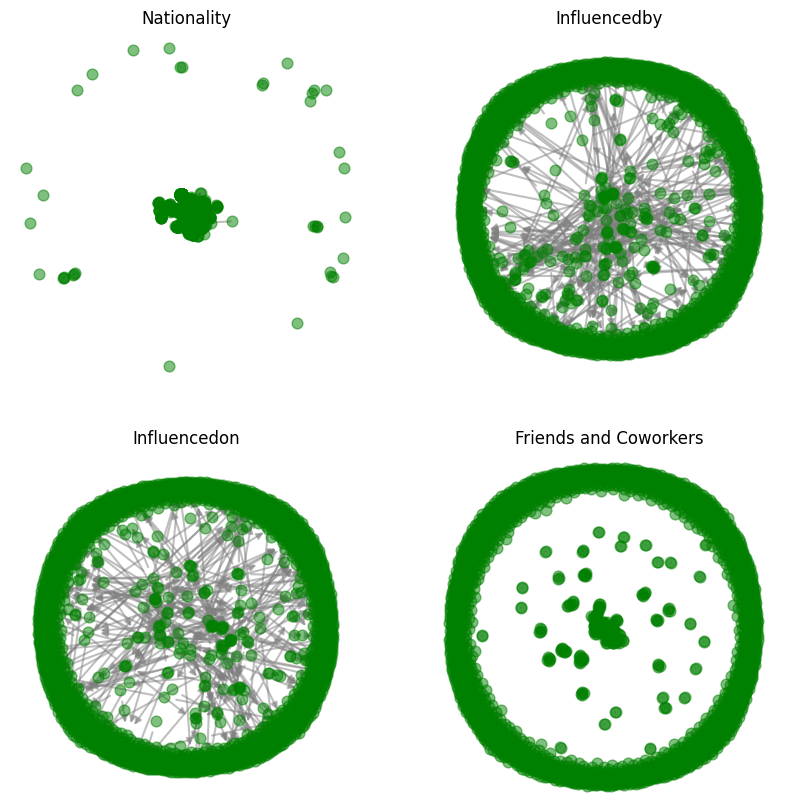

In [276]:
#Plot the graphs

def plot_4_networks_2d_subplots(graphs, layout_params_list=None):
    fig, axes = plt.subplots(2, 2, figsize=(10,10))
    axes = axes.flatten()
    titles = ["Nationality", "Influencedby", "Influencedon", "Friends and Coworkers"]


    for gi, G in enumerate(graphs):
        layout_params = layout_params_list[gi] if layout_params_list else None
        pos = nx.spring_layout(G, **layout_params) if layout_params else nx.spring_layout(G)

        nx.draw_networkx_edges(G, pos, width=1.5, alpha=0.5, edge_color='grey', ax=axes[gi])
        nx.draw_networkx_nodes(G, pos, node_size=60, node_color='green', alpha=0.5, ax=axes[gi])

        axes[gi].set_title(titles[gi])
        axes[gi].set_axis_off()

    plt.show()

graphs = [G_geo_B, G_influencedby_B, G_influencedon_B, G_friendsandcoworkers_B]
plot_4_networks_2d_subplots(graphs)
    

Plot only the nodes with non-zero neighbors:

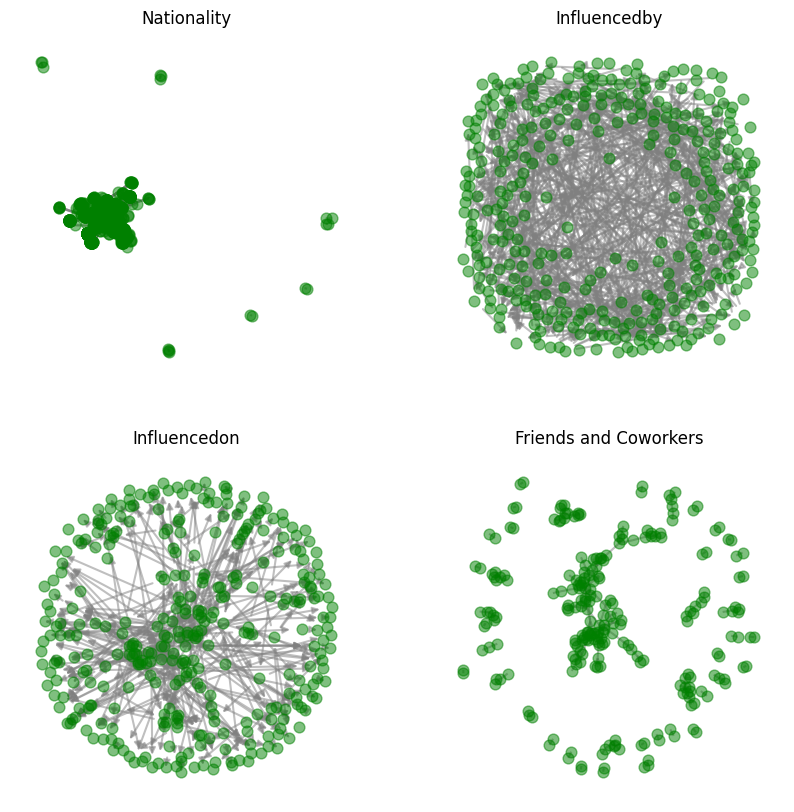

In [280]:
#Plot only the nodes and edges with threshold  

def threshold_degree(G, threshold):
    G_copy = G.copy()
    for node in G.nodes():
        if G.degree(node) < threshold:
            G_copy.remove_node(node)
    return G_copy

def threshold_weight(G,threshold):
    G_copy = G.copy()
    for edge in G.edges():
        if G[edge[0]][edge[1]]['weight'] < threshold:
            G_copy.remove_edge(edge[0], edge[1])
    return G_copy


G_influencedby_B_copy = threshold_degree(G_influencedby_B, 0.1)
G_influencedon_B_copy = threshold_degree(G_influencedon_B, 0.1)
G_friendsandcoworkers_B_copy = threshold_degree(G_friendsandcoworkers_B, 0.1)

G_geo_B_copy = threshold_weight(G_geo_B, 1/3)
G_geo_B_copy = threshold_degree(G_geo_B_copy, 0.1)


plot_4_networks_2d_subplots([G_geo_B_copy, G_influencedby_B_copy, G_influencedon_B_copy, G_friendsandcoworkers_B_copy], layout_params_list=[None, {'k':8.9, 'iterations':5}, {'k':None, 'iterations':55}, {'k':None, 'iterations':50}])

## B - 2) Geographical analysis

The main attributes:

- place of birth
- places
- places by years
- nationality

## C) Centrality measures


### Centrality measures on style

In [ ]:
degree_centrality_styles = nx.degree_centrality(G_styles_A)
closeness_centrality_styles = nx.closeness_centrality(G_styles_A)
betweenness_centrality_styles = nx.betweenness_centrality(G_styles_A)
eigenvector_centrality_styles = nx.eigenvector_centrality(G_styles_A, max_iter=1000)

centralities_styles_df = pd.DataFrame({
    'Degree Centrality': degree_centrality_styles,
    'Closeness Centrality': closeness_centrality_styles,
    'Betweenness Centrality': betweenness_centrality_styles,
    'Eigenvector Centrality': eigenvector_centrality_styles
})
(centralities_styles_df)

Degree Centrality  Closeness Centrality  \
Abstract Art                     0.517442              0.649038   
Abstract Expressionism           0.511628              0.649038   
Academicism                      0.377907              0.587342   
Action painting                  0.168605              0.516625   
American Realism                 0.110465              0.493517   
...                                   ...                   ...   
Ukiyo-e                          0.052326              0.468094   
Unknown                          0.802326              0.817307   
Verism                           0.063953              0.475295   
Yoruba                           0.000000              0.000000   
Zen                              0.029070              0.394058   

                        Betweenness Centrality  Eigenvector Centrality  
Abstract Art                          0.019326            1.648039e-01  
Abstract Expressionism                0.024073            1.640949e-01  
Academicism                           0.011328            1.301395e-01  
Action painting                       0.000336            6.902442e-02  
American Realism                      0.000421            4.618038e-02  
...                                        ...                     ...  
Ukiyo-e                               0.000000            2.334724e-02  
Unknown                               0.209355            1.896445e-01  
Verism                                0.000002            3.163736e-02  
Yoruba                                0.000000            1.625412e-20  
Zen                                   0.000000            1.051331e-02  

[173 rows x 4 columns]

### Centrality measures on movements

In [ ]:
degree_centrality_movements = nx.degree_centrality(G_movements_A)
closeness_centrality_movements = nx.closeness_centrality(G_movements_A)
betweenness_centrality_movements = nx.betweenness_centrality(G_movements_A)
eigenvector_centrality_movements = nx.eigenvector_centrality(G_movements_A, max_iter=1000)

centralities_movements_df = pd.DataFrame({
    'Degree Centrality': degree_centrality_movements,
    'Closeness Centrality': closeness_centrality_movements,
    'Betweenness Centrality': betweenness_centrality_movements,
    'Eigenvector Centrality': eigenvector_centrality_movements
})
centralities_movements_df

Degree Centrality  Closeness Centrality  \
Abstract Expressionism           0.918033              0.920412   
Abstract Art                     0.877049              0.884738   
Social Realism                   0.852459              0.864630   
Kinetic art                      0.844262              0.858129   
Avant-garde                      0.811475              0.833074   
...                                   ...                   ...   
Native Art                       0.721311              0.771156   
Pictorialism                     0.721311              0.771156   
Poster Art Realism               0.024590              0.479543   
Purism                           0.024590              0.467751   
Black Arts Movement              0.721311              0.771156   

                        Betweenness Centrality  Eigenvector Centrality  
Abstract Expressionism                0.029680                0.107795  
Abstract Art                          0.008157                0.107200  
Social Realism                        0.006798                0.106051  
Kinetic art                           0.002060                0.105759  
Avant-garde                           0.001162                0.103726  
...                                        ...                     ...  
Native Art                            0.000000                0.096296  
Pictorialism                          0.000000                0.096296  
Poster Art Realism                    0.000000                0.003415  
Purism                                0.000000                0.003414  
Black Arts Movement                   0.000000                0.096296  

[123 rows x 4 columns]

Centrality measures on the subgraph:

In [ ]:
degree_centrality_movements_2 = nx.degree_centrality(G3_copy)
closeness_centrality_movements_2 = nx.closeness_centrality(G3_copy)
betweenness_centrality_movements_2 = nx.betweenness_centrality(G3_copy)
eigenvector_centrality_movements_2 = nx.eigenvector_centrality(G3_copy, max_iter=1000)

centralities_movements_2_df = pd.DataFrame({
    'Degree Centrality': degree_centrality_movements_2,
    'Closeness Centrality': closeness_centrality_movements_2,
    'Betweenness Centrality': betweenness_centrality_movements_2,
    'Eigenvector Centrality': eigenvector_centrality_movements_2
})
centralities_movements_2_df

Degree Centrality  Closeness Centrality  \
Abstract Expressionism           0.557377              0.631950   
Abstract Art                     0.729508              0.746850   
Social Realism                   0.459016              0.583025   
Kinetic art                      0.303279              0.516393   
Avant-garde                      0.426230              0.568358   
...                                   ...                   ...   
Native Art                       0.073770              0.426268   
Pictorialism                     0.106557              0.445167   
Poster Art Realism               0.000000              0.000000   
Purism                           0.000000              0.000000   
Black Arts Movement              0.081967              0.432387   

                        Betweenness Centrality  Eigenvector Centrality  
Abstract Expressionism                0.014652            1.557765e-01  
Abstract Art                          0.070384            1.704636e-01  
Social Realism                        0.004620            1.417320e-01  
Kinetic art                           0.002384            1.006999e-01  
Avant-garde                           0.002870            1.364636e-01  
...                                        ...                     ...  
Native Art                            0.000000            2.865279e-02  
Pictorialism                          0.000000            4.188836e-02  
Poster Art Realism                    0.000000            7.435272e-17  
Purism                                0.000000            7.435272e-17  
Black Arts Movement                   0.000000            3.197368e-02  

[123 rows x 4 columns]

In [ ]:
centralities_movements_2_df['Degree Centrality'].sort_values(ascending=False).head(10)

Abstract Art              0.729508
Expressionism             0.721311
Contemporary              0.688525
Surrealism                0.680328
Realism                   0.631148
Romanticism               0.614754
Impressionism             0.614754
Post-Impressionism        0.598361
Abstract Expressionism    0.557377
Baroque                   0.557377
Name: Degree Centrality, dtype: float64

In [ ]:
centralities_movements_2_df['Closeness Centrality'].sort_values(ascending=False).head(10)

Abstract Art              0.746850
Expressionism             0.740728
Contemporary              0.717213
Surrealism                0.711566
Realism                   0.679465
Impressionism             0.669399
Romanticism               0.669399
Post-Impressionism        0.659627
Baroque                   0.636400
Abstract Expressionism    0.631950
Name: Closeness Centrality, dtype: float64

In [ ]:
centralities_movements_2_df['Betweenness Centrality'].sort_values(ascending=False).head(10)

Abstract Art          0.070384
Conceptual Art        0.056556
Expressionism         0.047621
Surrealism            0.046687
Contemporary          0.041723
Baroque               0.032658
Romanticism           0.025853
Realism               0.020515
Impressionism         0.018850
Post-Impressionism    0.017218
Name: Betweenness Centrality, dtype: float64

In [ ]:
centralities_movements_2_df['Eigenvector Centrality'].sort_values(ascending=False).head(10)

Expressionism             0.170761
Abstract Art              0.170464
Contemporary              0.168242
Surrealism                0.167546
Realism                   0.164672
Impressionism             0.163134
Post-Impressionism        0.161139
Romanticism               0.160748
Abstract Expressionism    0.155776
Symbolism                 0.155092
Name: Eigenvector Centrality, dtype: float64

In [ ]:
eigenvector_centrality_movements_2_2 = nx.eigenvector_centrality(G3_copy, max_iter=1000, weight='weight')
centralities_movements_2_df_2 = pd.DataFrame({
    'Eigenvector Centrality': eigenvector_centrality_movements_2_2
})
centralities_movements_2_df_2['Eigenvector Centrality'].sort_values(ascending=False).head(10)

Realism               0.524096
Impressionism         0.474053
Romanticism           0.317069
Post-Impressionism    0.313283
Symbolism             0.307701
Expressionism         0.285518
Academic Art          0.156206
Art Nouveau           0.137283
Surrealism            0.124829
Abstract Art          0.124621
Name: Eigenvector Centrality, dtype: float64

## +1) Community detection

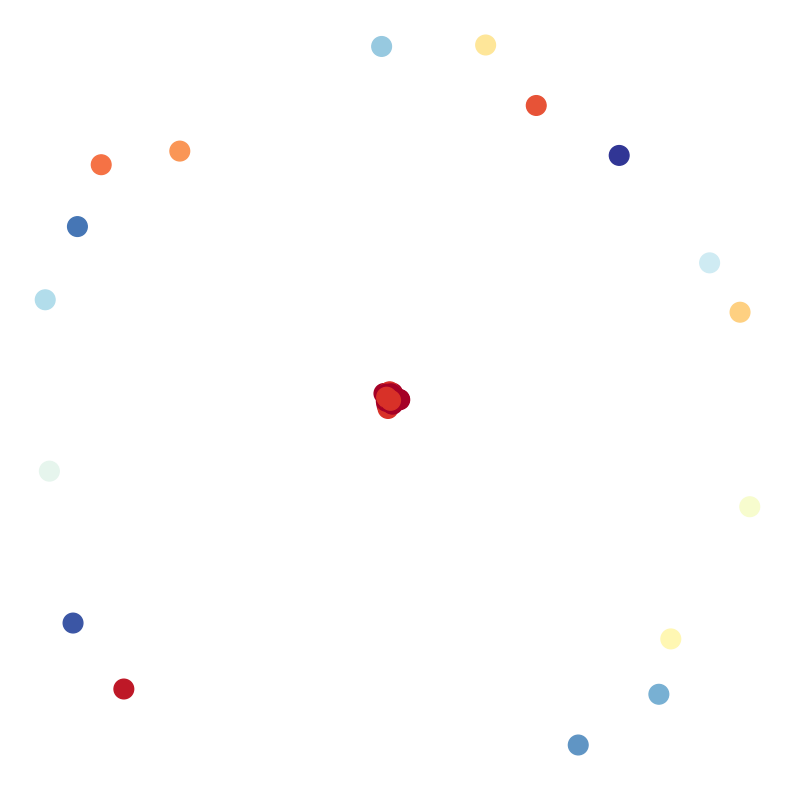

In [207]:
#Community detection

#Louvain
import community
partition = community.best_partition(G3_copy)
pos = nx.spring_layout(G3_copy)
plt.figure(figsize=(10,10))
plt.axis('off')
nx.draw_networkx_nodes(G3_copy, pos, node_size=200, cmap=plt.cm.RdYlBu, node_color=list(partition.values()))
nx.draw_networkx_edges(G3_copy, pos, alpha=0.3)
plt.show()


## Network connection: Six Degrees of Francis Bacon
Network of the people connected to Francis Bacon, sadly the people in the set are mostly all born in the 16th century and are English so most philosophers in this list are not super relevant, there is no Kant, Nietzsche, etc.  But good example of a network

http://www.sixdegreesoffrancisbacon.com/?ids=10000473&min_confidence=60&type=network

<details><summary><u>Code for obtaining graph</u></summary>
<p>
    
```python
import igraph as ig #To install: conda install -c conda-forge python-igraph  
people = pd.read_csv('datasets/SDFB_people_.csv')
relationships = pd.read_csv('datasets/SDFB_relationships_.csv')

#I used igraph, because it's faster than networkx, and graph-tool sucks on Windows
network = relationships.rename(columns={'id': 'relationship_id', }).drop(columns=['created_by', 'approved_by', 'citation'])
print(network.head(), '\n')
cols = network.columns.tolist()
cols = cols[1:3] + cols[0:1] + cols[3:]
network = network[cols]
network = network[network['person1_index'] != 10050190] #for some reason, there is no person with this id, I did a loop
# I used the documentation here: https://python.igraph.org/en/stable/generation.html#from-pandas-dataframe-s  this I followed
# this is important too: https://python.igraph.org/en/stable/api/igraph.Graph.html#DataFrame  
g = ig.Graph.DataFrame(network, directed=False, vertices=people[['id', 'display_name','historical_significance','birth_year','death_year']], use_vids=False)
print(g.summary().replace(',', '\n'))
```
    
</p>
</details>

<details><summary><u>Code for filtering</u></summary>
<p>
    
```python
filtered = g.vs.select(_degree = 0) #https://python.igraph.org/en/stable/tutorial.html#selecting-vertices-and-edges
g.delete_vertices(filtered)

import cairo #Needed for plotting #import cairocffi as cairo  # can do matplotlib too
#layout = g.layout(layout='auto')
#ig.plot(g, layout = layout) #ig.plot(g) #looks even worse

```
    
</p>
</details>

<details><summary><u>Code for obtaining graph</u></summary>
<p>
    
```python
layout = g.layout(layout='reingold_tilford_circular') #kamada_kawai requires too much computing, 'fruchterman_reingold' is too dense
visual_style = {}
visual_style["vertex_size"] = 5
visual_style["vertex_color"] = "blue"
visual_style['bbox'] = (900, 900)
visual_style["layout"] = layout
#ig.plot(g, **visual_style) #Commented out because it takes big memory
# Needs improvement, but it's a start
```
    
</p>
</details>
